# Logistic Regression Using Breast Cancer
Goal: Classify tumors as Benign or Malignant using features derived from cell nuclei analysis via fine‑needle aspiration 
fderyckel.
Outcome: Build and evaluate a classification model that predicts cancer type for new input samples.

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("C:/Users/DELL/Desktop/cancer.csv")

# Data Preprocessing and Data Cleaning

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [7]:
df.shape

(569, 33)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
df.isnull().sum().sum()

569

In [19]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [23]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [25]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

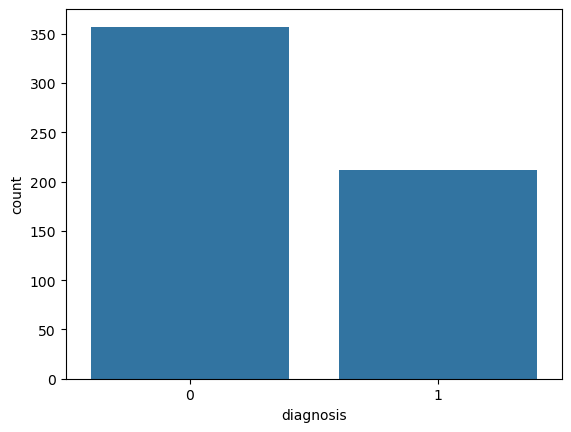

In [29]:
sns.countplot(data=df,x='diagnosis')
plt.title('')
plt.show('Benign vs Malignant')

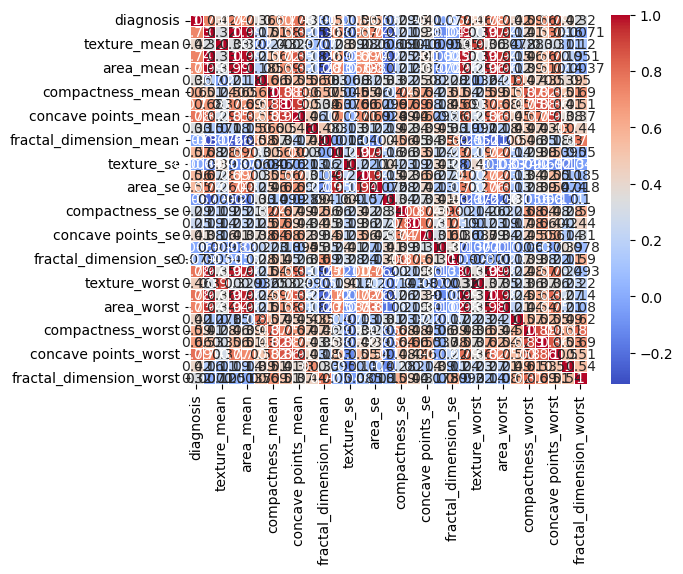

In [39]:
sns.heatmap(a,annot=True, cmap='coolwarm', linewidths=0.6)
plt.show()

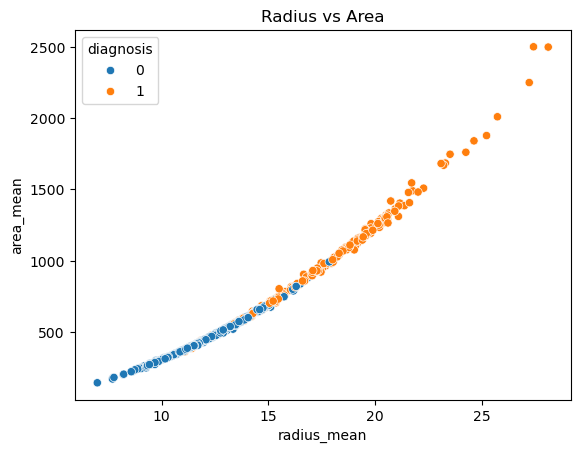

In [41]:
#feature relationship
sns.scatterplot(data=df,x='radius_mean',y='area_mean',hue='diagnosis')
plt.title('Radius vs Area')
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [53]:
X=df.drop(columns=['diagnosis'],axis=1)
y=df['diagnosis']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [58]:
# Scaling
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix,classification_report, roc_auc_score)

In [71]:
model=LogisticRegression(max_iter=10000)
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]
print(pred)
print(y_prob)

[0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0
 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1]
[3.67867292e-04 1.00000000e+00 7.20875876e-02 7.72712520e-01
 5.70216034e-01 1.92536830e-03 8.78170008e-01 1.19485590e-03
 6.63609457e-04 1.56023985e-02 9.88432770e-01 1.52766997e-04
 9.99999996e-01 5.44638339e-03 1.49440401e-02 1.78767503e-06
 1.23689524e-01 3.56646334e-04 3.33264487e-01 4.69621837e-05
 6.03529307e-04 4.47928630e-03 9.99999995e-01 9.99733573e-01
 9.21585302e-01 1.89039371e-04 1.41051727e-04 9.90073368e-01
 9.99317903e-01 9.99991836e-01 9.99999729e-01 2.92513685e-03
 9.99997714e-01 9.99994276e-01 3.79230428e-04 2.07908161e-02
 2.37303592e-03 3.48972814e-06 9.99290486e-01 2.17204209e-01
 2.07684891e-04 5.27711157e-04 9.40618335e-01 2.31372252e-03
 2.03977475e-02 9.93326534e-01 6.67343722e-02 9.99833336e-01
 3.53221891e-05 1.49205692e-03 1.00

In [74]:
print("Accuarcy " ,accuracy_score(y_test,y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Accuarcy  0.9824561403508771
ROC-AUC: 0.9970238095238095
Confusion Matrix:
 [[71  1]
 [ 1 41]]
Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# Conclusion
Accuracy
This means:
98.24% of the predictions were correct on the test set.
Out of 114 test samples, only 2 were incorrect.

ROC -AUC
AUC = Area Under the Curve (from ROC curve)
Closer to 1.0 means the model is very good at separating benign and malignant.
0.9970 = Outstanding performance

Confusion Matrix
True Positives (TP) = 41 → Malignant predicted correctly
True Negatives (TN) = 71 → Benign predicted correctly
False Positives (FP) = 1 → Benign predicted as malignant
False Negatives (FN) = 1 → Malignant predicted as benign (critical in healthcare)


In [88]:
import numpy as np

print("Enter the tumor characteristics:")
radius = float(input("radius_mean: "))
texture = float(input("texture_mean: "))
perimeter = float(input("perimeter_mean: "))
area = float(input("area_mean: "))
smoothness = float(input("smoothness_mean: "))
compactness = float(input("compactness_mean: "))
concavity = float(input("concavity_mean: "))
concave_points = float(input("concave points_mean: "))
symmetry = float(input("symmetry_mean: "))
fractal_dimension = float(input("fractal_dimension_mean: "))
radius_se = float(input("radius_se: "))
texture_se = float(input("texture_se: "))
perimeter_se = float(input("perimeter_se: "))
area_se = float(input("area_se: "))
smoothness_se = float(input("smoothness_se: "))
compactness_se = float(input("compactness_se: "))
concavity_se = float(input("concavity_se: "))
concave_points_se = float(input("concave points_se: "))
symmetry_se = float(input("symmetry_se: "))
fractal_dimension_se = float(input("fractal_dimension_se: "))
radius_worst = float(input("radius_worst: "))
texture_worst = float(input("texture_worst: "))
perimeter_worst = float(input("perimeter_worst: "))
area_worst = float(input("area_worst: "))
smoothness_worst = float(input("smoothness_worst: "))
compactness_worst = float(input("compactness_worst: "))
concavity_worst = float(input("concavity_worst: "))
concave_points_worst = float(input("concave points_worst: "))
symmetry_worst = float(input("symmetry_worst: "))
fractal_dimension_worst = float(input("fractal_dimension_worst: "))

# Convert to array and reshape
user_data = np.array([[radius, texture, perimeter,
       area, smoothness, compactness, concavity,
       concave_points, symmetry, fractal_dimension,
       radius_se, texture_se, perimeter_se, area_se, smoothness_se,
       compactness_se, concavity_se, concave_points_se, symmetry_se,
       fractal_dimension_se, radius_worst, texture_worst,
       perimeter_worst, area_worst, smoothness_worst,
       compactness_worst, concavity_worst, concave_points_worst,
       symmetry_worst, fractal_dimension_worst]])

# Scale the input using the same scaler used on training data
user_data_scaled = scaler.transform(user_data)

# Make prediction
prediction = model.predict(user_data_scaled)
predicted_class = "Malignant" if prediction[0] == 1 else "Benign"

# Output
print(f"\nPredicted Diagnosis: {predicted_class}")


Enter the tumor characteristics:


radius_mean:  20.50
texture_mean:  17
perimeter_mean:  128
area_mean:  999
smoothness_mean:  0.12
compactness_mean:  0.4
concavity_mean:  0.25
concave points_mean:  0.1
symmetry_mean:  23
fractal_dimension_mean:  108
radius_se:  2.0
texture_se:  4.0
perimeter_se:  34
area_se:  12
smoothness_se:  10
compactness_se:  34
concavity_se:  76
concave points_se:  120
symmetry_se:  24
fractal_dimension_se:  15
radius_worst:  16
texture_worst:  20.0
perimeter_worst:  40.9
area_worst:  20
smoothness_worst:  134
compactness_worst:  19
concavity_worst:  109
concave points_worst:  56
symmetry_worst:  45
fractal_dimension_worst:  2



Predicted Diagnosis: Malignant


C:\Users\DELL\Untitled Folder 1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [83]:
df.colunms

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
